# Pairs Trading Demo

## Introduction

Pairs Trading is very popular market nuetral strategy i.e it does not matter whether the market is trending upwards or downwards. The concept behind this strategy being, the stock prices of the chosen pair have a high positive correlation, implying a long position on one stock can be paired with short position on the other.

## Pairs Identification

TBD

For the purposes of this demo, we will use the following pairs 

- BAJA AUTO & HERO MOTORS
- COCA COLA & PEPSI
- ICICI & AXIS

## Statistics behind the Strategy

### Correlation

DA DA DA .....

This ranges between +1 and -1

+1 implies a perfect positive correlation i.e when one stock (price) moves either up or down, the other would also move in the same direction with the same magnitude. 

While correlation gives us a fair indication, it can lead to losses under certain circumstances. For example, this being a mean reversion strategy, if both stock are moving up in tandem (without reverting to their mean), the long / short positions on the stocks may result in losses. 

### Cointegration

This is a statistical property of two or more time-series variables which indicates if a linear combination of these variables is stationary. 

DA DA DA ....

### Z-Score

z = (x – μ) / σ

Given a normal distribution of raw data points, z-score is calculated so that the new distribution is a normal distribution with mean 0 and standard deviation of 1. In pairs trading, we can convert the distribution of spread between the stocks (raw data points) into z-scores

DA DA DA ....

In [1]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint

# just set the seed for the random number generator
np.random.seed(1)

import matplotlib.pyplot as plt

In [2]:
bajaj_df = pd.read_csv('BAJAJ-AUTO/BAJAJ-AUTONSE.csv')

In [3]:
bajaj_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-06-18,1555.000000,1520.000000,1539.500000,1542.449951,327747.0,1232.155884
1,2012-06-19,1545.150024,1526.000000,1540.000000,1535.400024,199100.0,1226.524170
2,2012-06-20,1541.000000,1528.650024,1535.000000,1535.199951,527580.0,1226.364380
3,2012-06-21,1545.000000,1516.199951,1531.800049,1536.250000,618693.0,1227.203125
4,2012-06-22,1558.849976,1524.000000,1524.000000,1545.400024,435310.0,1234.512573
...,...,...,...,...,...,...,...
2015,2020-08-28,3062.449951,3002.000000,3044.000000,3014.149902,679405.0,3014.149902
2016,2020-08-31,3029.000000,2946.100098,3025.000000,2967.000000,2787032.0,2967.000000
2017,2020-09-01,3004.000000,2930.000000,2947.000000,2958.399902,755670.0,2958.399902
2018,2020-09-02,2969.699951,2847.050049,2950.000000,2880.550049,1946352.0,2880.550049


    - We have daily stock prices for BAJAJ AUTO from 18th June 2012 till 3rd Sep 2020

In [5]:
bajaj_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2020.000000,2020.000000,2020.000000,2020.000000,2.020000e+03,2020.000000
mean,2535.587222,2475.467927,2506.373910,2504.713268,4.098769e+05,2254.554125
std,453.855485,448.154254,451.683859,450.014071,3.434037e+05,498.844429
min,1493.099976,1425.099976,1445.000000,1445.050049,0.000000e+00,1188.120117
25%,2127.587524,2070.537476,2100.762512,2098.700012,2.237888e+05,1790.177551
50%,2611.949951,2540.450073,2574.000000,2575.850098,3.179670e+05,2339.175171
75%,2885.312439,2825.574951,2855.000000,2853.412598,4.772985e+05,2636.698853
max,3468.350098,3341.100098,3419.000000,3412.949951,4.976986e+06,3143.342529


In [4]:
hero_df = pd.read_csv('HEROMOTOCO/HEROMOTOCONSE.csv')

In [6]:
hero_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-07-01,317.500000,307.000000,311.799988,312.350006,113852.0,167.994629
1,2002-07-02,323.000000,313.500000,314.799988,315.399994,166016.0,169.635025
2,2002-07-03,322.500000,312.000000,316.250000,314.350006,196486.0,169.070328
3,2002-07-04,319.850006,316.750000,316.750000,318.149994,233997.0,171.114120
4,2002-07-05,330.000000,319.899994,319.899994,324.049988,472596.0,174.287369
...,...,...,...,...,...,...,...
4479,2020-08-28,3164.000000,3050.649902,3119.050049,3059.300049,1838010.0,3059.300049
4480,2020-08-31,3088.899902,2966.100098,3070.000000,3006.050049,1808588.0,3006.050049
4481,2020-09-01,3074.300049,2975.500000,3030.050049,2995.600098,1357833.0,2995.600098
4482,2020-09-02,3039.800049,2876.149902,3034.949951,2943.550049,2809547.0,2943.550049


    - We have daily stock prices for HERO MOTORS from 1st July 2002 to 3rd Sep 2020

### Lets consider stocks for the dates --> 2016-01-01 to 2020-08-01 and elimate all other rows 

In [12]:
hero_df = hero_df[hero_df['Date'] >= '2016-01-01']

In [13]:
hero_df

,Date,High,Low,Open,Close,Volume,Adj Close
3333,2016-01-01,2695.000000,2675.199951,2689.000000,2686.050049,141582.0,2273.370850
3334,2016-01-04,2669.000000,2631.100098,2652.000000,2637.800049,254167.0,2232.534180
3335,2016-01-05,2655.199951,2610.050049,2642.500000,2616.850098,290015.0,2214.802734
3336,2016-01-06,2623.000000,2572.949951,2604.199951,2578.199951,307058.0,2182.090820
3337,2016-01-07,2592.000000,2510.050049,2556.899902,2520.100098,186980.0,2132.916992
...,...,...,...,...,...,...,...
4479,2020-08-28,3164.000000,3050.649902,3119.050049,3059.300049,1838010.0,3059.300049
4480,2020-08-31,3088.899902,2966.100098,3070.000000,3006.050049,1808588.0,3006.050049
4481,2020-09-01,3074.300049,2975.500000,3030.050049,2995.600098,1357833.0,2995.600098
4482,2020-09-02,3039.800049,2876.149902,3034.949951,2943.550049,2809547.0,2943.550049


In [14]:
bajaj_df = bajaj_df[bajaj_df['Date'] >= '2016-01-01']

In [15]:
bajaj_df

,Date,High,Low,Open,Close,Volume,Adj Close
869,2016-01-01,2530.100098,2511.000000,2530.100098,2518.000000,70853.0,2209.871338
870,2016-01-04,2547.600098,2475.449951,2490.000000,2483.350098,190056.0,2179.461182
871,2016-01-05,2523.350098,2491.449951,2500.000000,2502.350098,192154.0,2196.136230
872,2016-01-06,2514.149902,2473.500000,2492.199951,2485.500000,222912.0,2181.347900
873,2016-01-07,2485.000000,2406.850098,2475.000000,2419.250000,221180.0,2123.205322
...,...,...,...,...,...,...,...
2015,2020-08-28,3062.449951,3002.000000,3044.000000,3014.149902,679405.0,3014.149902
2016,2020-08-31,3029.000000,2946.100098,3025.000000,2967.000000,2787032.0,2967.000000
2017,2020-09-01,3004.000000,2930.000000,2947.000000,2958.399902,755670.0,2958.399902
2018,2020-09-02,2969.699951,2847.050049,2950.000000,2880.550049,1946352.0,2880.550049


    - We see that both BAJAJ & HERO data frames have same number of rows and columns 

In [28]:
import seaborn as sns

In [67]:
b_df = bajaj_df.drop(columns=['High', 'Low', 'Open', 'Close', 'Volume'])

In [68]:
b_df = b_df.set_index('Date')

In [69]:
b_df

,Adj Close
Date,
2016-01-01,2209.871338
2016-01-04,2179.461182
2016-01-05,2196.136230
2016-01-06,2181.347900
2016-01-07,2123.205322
...,...
2020-08-28,3014.149902
2020-08-31,2967.000000
2020-09-01,2958.399902


In [72]:
h_df = hero_df.drop(columns=['High', 'Low', 'Open', 'Close', 'Volume'])

In [73]:
h_df = h_df.set_index('Date')

In [74]:
h_df

,Adj Close
Date,
2016-01-01,2273.370850
2016-01-04,2232.534180
2016-01-05,2214.802734
2016-01-06,2182.090820
2016-01-07,2132.916992
...,...
2020-08-28,3059.300049
2020-08-31,3006.050049
2020-09-01,2995.600098


In [75]:
h_df = h_df.rename(columns={'Adj Close':'HClose'})

In [76]:
b_df = b_df.rename(columns={'Adj Close':'BClose'})

In [77]:
final_df = h_df.join(b_df)

In [78]:
final_df

,HClose,BClose
Date,,
2016-01-01,2273.370850,2209.871338
2016-01-04,2232.534180,2179.461182
2016-01-05,2214.802734,2196.136230
2016-01-06,2182.090820,2181.347900
2016-01-07,2132.916992,2123.205322
...,...,...
2020-08-28,3059.300049,3014.149902
2020-08-31,3006.050049,2967.000000
2020-09-01,2995.600098,2958.399902


In [81]:
final_df = final_df.reset_index()

In [82]:
final_df

,Date,HClose,BClose
0,2016-01-01,2273.370850,2209.871338
1,2016-01-04,2232.534180,2179.461182
2,2016-01-05,2214.802734,2196.136230
3,2016-01-06,2182.090820,2181.347900
4,2016-01-07,2132.916992,2123.205322
...,...,...,...
1146,2020-08-28,3059.300049,3014.149902
1147,2020-08-31,3006.050049,2967.000000
1148,2020-09-01,2995.600098,2958.399902
1149,2020-09-02,2943.550049,2880.550049


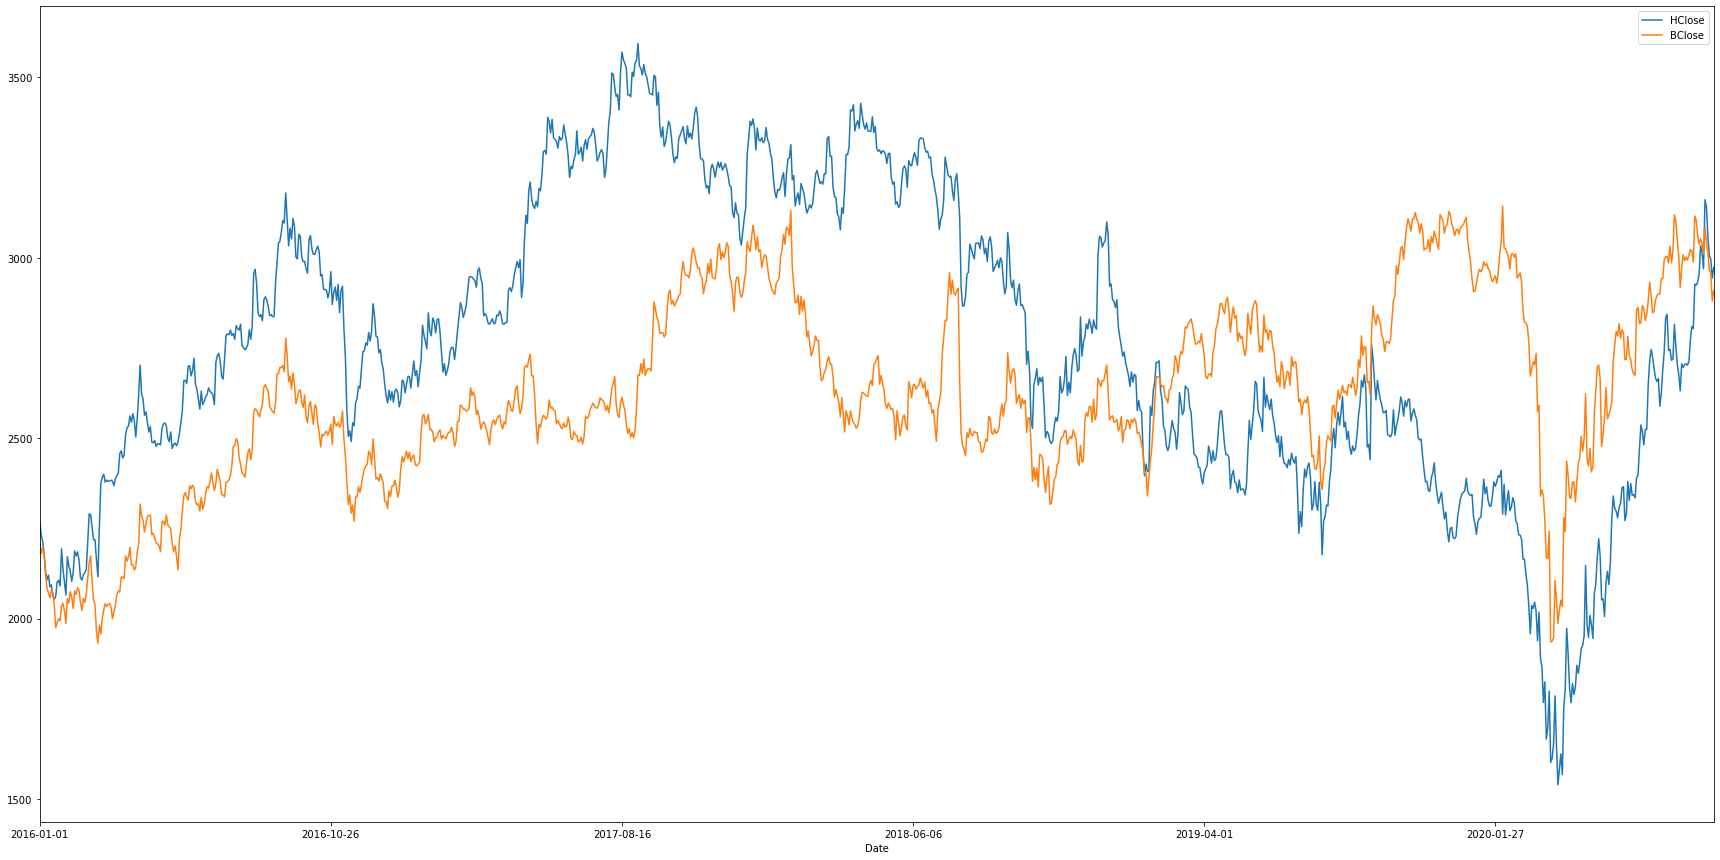

In [95]:
final_df.plot(x='Date', y=['HClose', 'BClose'], figsize=(30,15))

In [90]:
final_df.corr()

,HClose,BClose
HClose,1.000000,0.298045
BClose,0.298045,1.000000


In [91]:
coint(h_df, b_df)

(-1.7541908378818656,
 0.651694537353924,
 array([-3.90598874, -3.34144829, -3.04814006]))

In [92]:
bajaj_df

,Date,High,Low,Open,Close,Volume,Adj Close
869,2016-01-01,2530.100098,2511.000000,2530.100098,2518.000000,70853.0,2209.871338
870,2016-01-04,2547.600098,2475.449951,2490.000000,2483.350098,190056.0,2179.461182
871,2016-01-05,2523.350098,2491.449951,2500.000000,2502.350098,192154.0,2196.136230
872,2016-01-06,2514.149902,2473.500000,2492.199951,2485.500000,222912.0,2181.347900
873,2016-01-07,2485.000000,2406.850098,2475.000000,2419.250000,221180.0,2123.205322
...,...,...,...,...,...,...,...
2015,2020-08-28,3062.449951,3002.000000,3044.000000,3014.149902,679405.0,3014.149902
2016,2020-08-31,3029.000000,2946.100098,3025.000000,2967.000000,2787032.0,2967.000000
2017,2020-09-01,3004.000000,2930.000000,2947.000000,2958.399902,755670.0,2958.399902
2018,2020-09-02,2969.699951,2847.050049,2950.000000,2880.550049,1946352.0,2880.550049


In [93]:
hero_df

,Date,High,Low,Open,Close,Volume,Adj Close
3333,2016-01-01,2695.000000,2675.199951,2689.000000,2686.050049,141582.0,2273.370850
3334,2016-01-04,2669.000000,2631.100098,2652.000000,2637.800049,254167.0,2232.534180
3335,2016-01-05,2655.199951,2610.050049,2642.500000,2616.850098,290015.0,2214.802734
3336,2016-01-06,2623.000000,2572.949951,2604.199951,2578.199951,307058.0,2182.090820
3337,2016-01-07,2592.000000,2510.050049,2556.899902,2520.100098,186980.0,2132.916992
...,...,...,...,...,...,...,...
4479,2020-08-28,3164.000000,3050.649902,3119.050049,3059.300049,1838010.0,3059.300049
4480,2020-08-31,3088.899902,2966.100098,3070.000000,3006.050049,1808588.0,3006.050049
4481,2020-09-01,3074.300049,2975.500000,3030.050049,2995.600098,1357833.0,2995.600098
4482,2020-09-02,3039.800049,2876.149902,3034.949951,2943.550049,2809547.0,2943.550049


In [96]:
tvs_df = pd.read_csv('TVSMOTOR/TVSMOTORNSE.csv')

In [97]:
tvs_df = tvs_df[tvs_df['Date'] >= '2016-01-01']

In [98]:
tvs_df

,Date,High,Low,Open,Close,Volume,Adj Close
3811,2016-01-01,292.250000,285.350006,290.000000,286.649994,970577.0,286.649994
3812,2016-01-04,290.950012,283.500000,290.000000,286.950012,1356574.0,286.950012
3813,2016-01-05,289.200012,282.149994,287.350006,287.149994,993192.0,287.149994
3814,2016-01-06,294.399994,285.000000,288.399994,286.450012,1278055.0,286.450012
3815,2016-01-07,284.750000,275.049988,284.750000,277.700012,893479.0,277.700012
...,...,...,...,...,...,...,...
4957,2020-08-28,463.000000,448.350006,459.000000,449.750000,2669472.0,449.750000
4958,2020-08-31,454.899994,429.500000,453.000000,432.850006,3073232.0,432.850006
4959,2020-09-01,442.500000,428.000000,437.450012,440.399994,2704221.0,440.399994
4960,2020-09-02,441.399994,427.000000,435.100006,437.100006,4147271.0,437.100006


In [99]:
t_df = tvs_df.drop(columns=['High', 'Low', 'Open', 'Close', 'Volume'])

In [101]:
t_df = t_df.set_index('Date')

In [102]:
t_df = t_df.rename(columns={'Adj Close':'TClose'})

In [103]:
t_df

,TClose
Date,
2016-01-01,286.649994
2016-01-04,286.950012
2016-01-05,287.149994
2016-01-06,286.450012
2016-01-07,277.700012
...,...
2020-08-28,449.750000
2020-08-31,432.850006
2020-09-01,440.399994


In [105]:
final_df = h_df.join(b_df).join(t_df)

In [106]:
final_df

,HClose,BClose,TClose
Date,,,
2016-01-01,2273.370850,2209.871338,286.649994
2016-01-04,2232.534180,2179.461182,286.950012
2016-01-05,2214.802734,2196.136230,287.149994
2016-01-06,2182.090820,2181.347900,286.450012
2016-01-07,2132.916992,2123.205322,277.700012
...,...,...,...
2020-08-28,3059.300049,3014.149902,449.750000
2020-08-31,3006.050049,2967.000000,432.850006
2020-09-01,2995.600098,2958.399902,440.399994


In [107]:
final_df = final_df.reset_index()

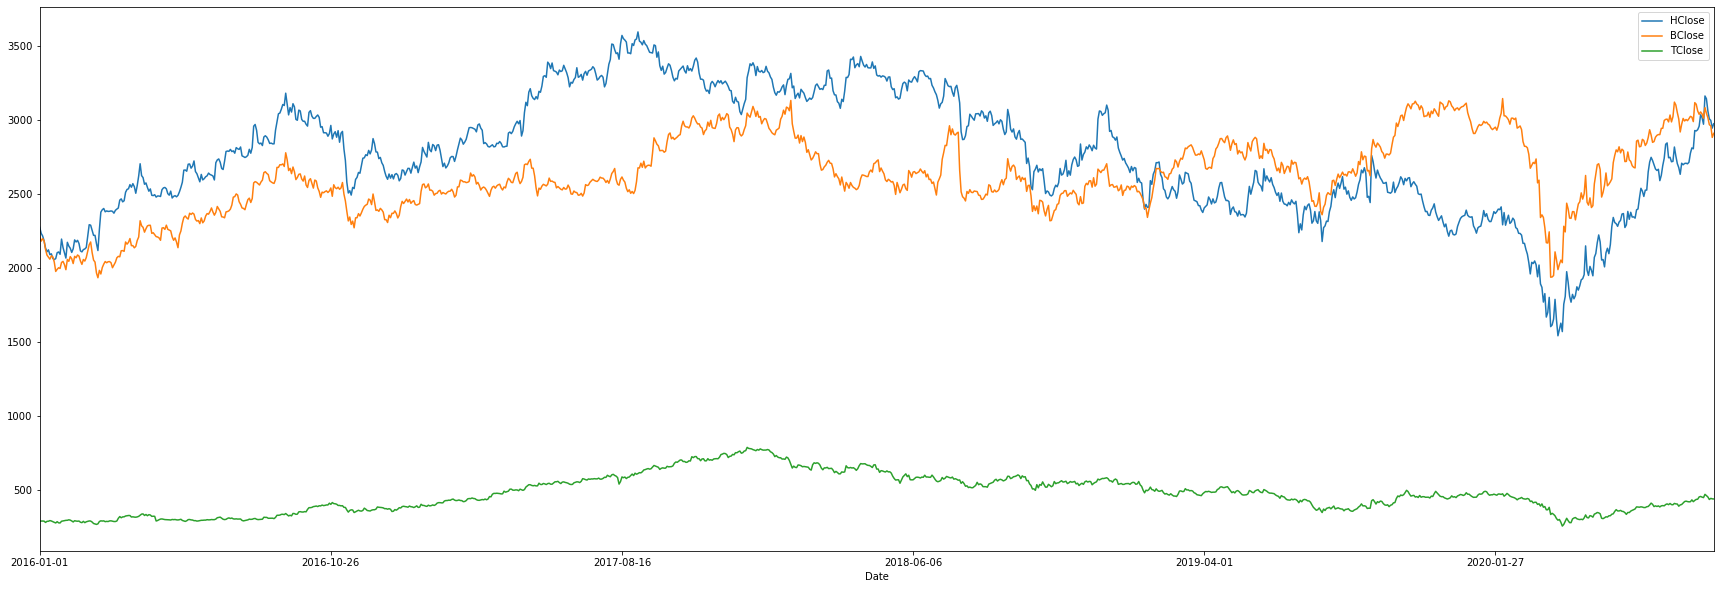

In [109]:
final_df.plot(x='Date', y=['HClose', 'BClose', 'TClose'], figsize=(30,10))

In [114]:
final_df_1 = final_df[final_df['Date'] >= '2016-02-01']

In [116]:
final_df_1 = final_df_1[final_df_1['Date'] <= '2017-02-01']

In [117]:
final_df_1

,Date,HClose,BClose,TClose
20,2016-02-01,2146.036133,2043.033569,295.450012
21,2016-02-02,2131.393066,2074.804199,293.350006
22,2016-02-03,2103.082764,2060.366943,287.750000
23,2016-02-04,2127.585449,2027.894531,280.950012
24,2016-02-05,2187.634277,2076.779053,289.350006
...,...,...,...,...
263,2017-01-25,2812.982178,2561.871582,392.799988
264,2017-01-27,2785.610107,2565.872314,392.350006
265,2017-01-30,2767.289551,2539.755859,388.549988
266,2017-01-31,2747.929688,2547.307617,386.200012


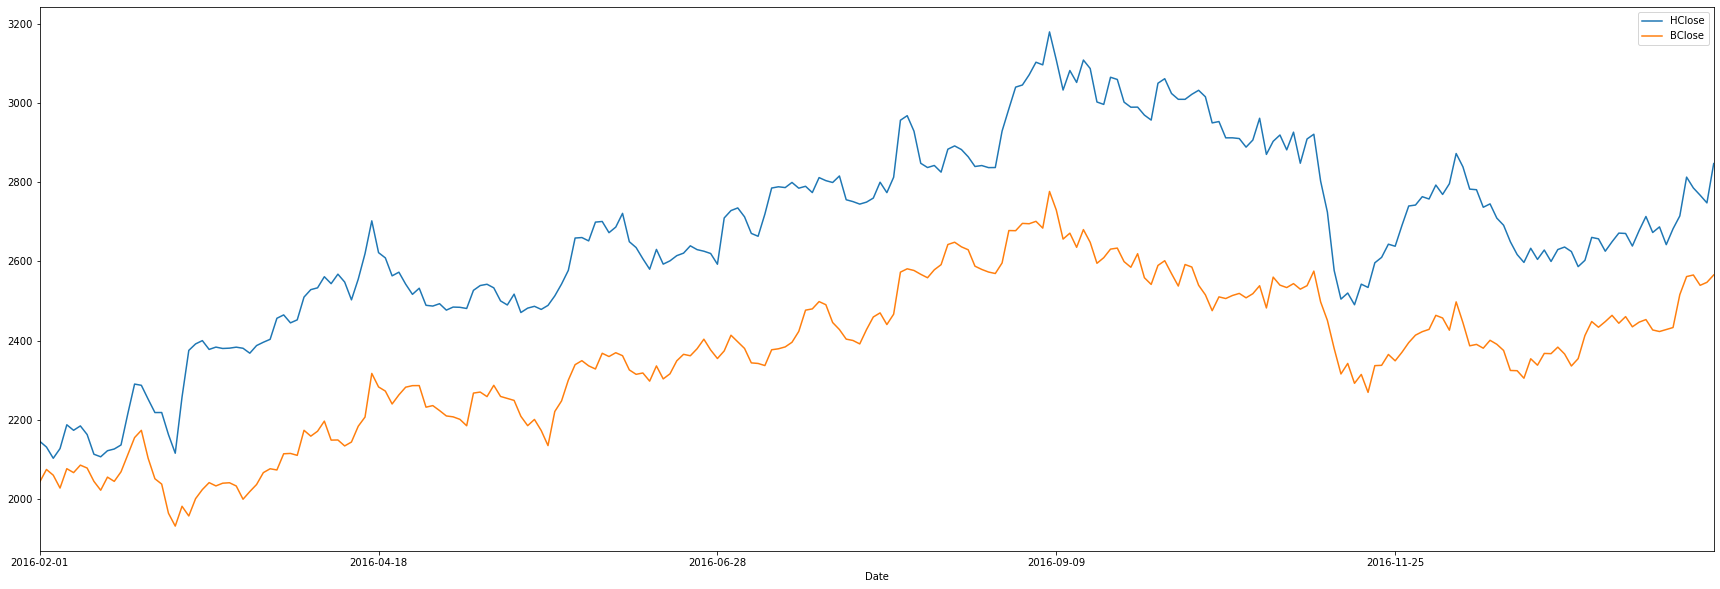

In [119]:
final_df_1.plot(x='Date', y=['HClose', 'BClose'], figsize=(30,10))

In [120]:
final_df_1.corr()

,HClose,BClose,TClose
HClose,1.000000,0.940683,0.521506
BClose,0.940683,1.000000,0.535715
TClose,0.521506,0.535715,1.000000


In [122]:
score, pvalue, _ = coint(final_df_1['HClose'], final_df_1['BClose'])

In [123]:
pvalue

0.04926911928808074

In [124]:
spread = final_df_1['HClose'] - final_df_1['BClose']

In [125]:
spread

20     103.002563
21      56.588867
22      42.715820
23      99.690918
24     110.855225
          ...    
263    251.110596
264    219.737793
265    227.533691
266    200.622070
267    281.280273
Length: 248, dtype: float64

In [126]:
def zscore(stocks):
    return (stocks - stocks.mean())/np.std(stocks)

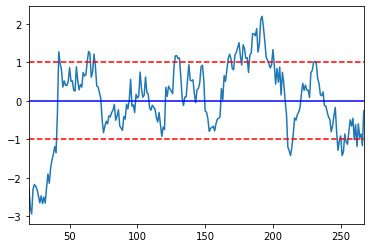

In [127]:
zscore(spread).plot()
plt.axhline(zscore(spread).mean(), c='b')
plt.axhline(1.0, c='r', ls='--')
plt.axhline(-1.0, c='r', ls='--')

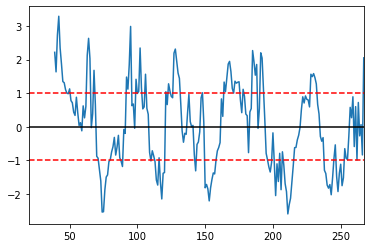

In [129]:
spread_mavg1 = spread.rolling(1).mean()
spread_mavg20 = spread.rolling(20).mean()
spread_std_20 = spread.rolling(20).std()

zscore_20_1 = (spread_mavg1 - spread_mavg20)/spread_std_20

zscore_20_1.plot(label='Rolling 20 day z score')
plt.axhline(0, c='black')
plt.axhline(1.0, c='r', ls='--')
plt.axhline(-1.0, c='r', ls='--')